In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import librosa
import librosa.display

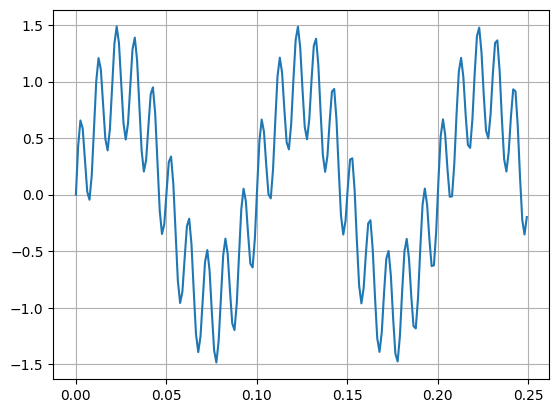

In [2]:
class SinMix():
  def __init__(self, amplitude1=1.0, frequency1=10.0, amplitude2=0.5, frequency2=80.0):
    # Number of samplepoints
    N = 600
    # sample spacing
    T = 1.0 / 800.0
    x = np.linspace(0.0, N*T, N)
    y = amplitude1*np.sin(frequency1 * 2.0*np.pi*x) + amplitude2*np.sin(frequency2 * 2.0*np.pi*x)
    self.x = x
    self.y = y
    self.x_sp = np.linspace(0.0, 1.0//(2.0*T), N//2)
    self.y_sp = fft(self.y)[0:N//2]

  def plotTimeDomain(self):
    plt.plot(self.x[:200], self.y[:200])
    plt.grid()
    plt.show()

  def plotFrequencyDomain(self):
    plt.plot(self.x_sp, np.abs(self.y_sp))
    plt.grid()

  def plotFrequencyDomainDB(self):
    y_sp_db = librosa.amplitude_to_db(abs(self.y_sp))
    plt.plot(self.x_sp, y_sp_db)
    plt.grid()

sinMix = SinMix(frequency1=10.0, frequency2=100.0)
sinMix.plotTimeDomain()

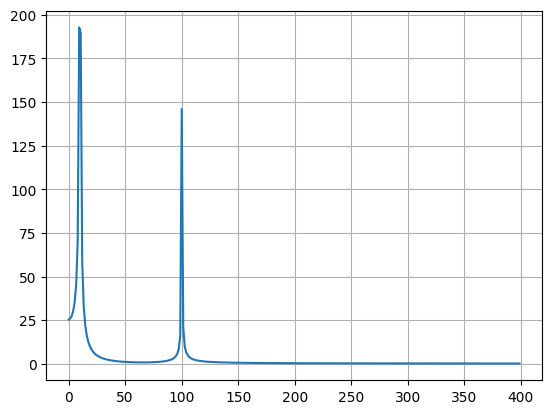

In [3]:
sinMix.plotFrequencyDomain()

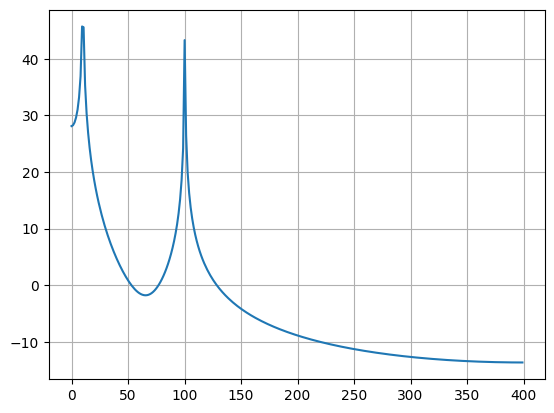

In [4]:
sinMix.plotFrequencyDomainDB()

In [5]:
# imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

In [10]:
class AudioSignal:

  @staticmethod
  def __record(file_name, sec=3):
    RECORD = """
    const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
    const b2text = blob => new Promise(resolve => {
      const reader = new FileReader()
      reader.onloadend = e => resolve(e.srcElement.result)
      reader.readAsDataURL(blob)
    })
    var record = time => new Promise(async resolve => {
      stream = await navigator.mediaDevices.getUserMedia({ audio: true })
      recorder = new MediaRecorder(stream)
      chunks = []
      recorder.ondataavailable = e => chunks.push(e.data)
      recorder.start()
      await sleep(time)
      recorder.onstop = async ()=>{
        blob = new Blob(chunks)
        text = await b2text(blob)
        resolve(text)
      }
      recorder.stop()
    })
    """
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    audio = AudioSegment.from_file(BytesIO(b))
    audio.export(file_name, format='wav', parameters=["-ar", "8000"])
    return audio

  def __init__(self, file_name):
    self.sample_rate = 8000
    self.file_name = file_name

  def record(self, sec):
    self.audioSegment = self.__record(self.file_name, sec)
    return self.audioSegment

  def plotTimeDomain(self, start = 0, end = None):
    values, sr = librosa.load(self.file_name, sr=self.sample_rate)
    plt.figure(figsize=(25, 5))
    plt.plot(values[start:end])
    plt.grid()

  def frequencyDomain(self, start = 0, end = None, window_length=128):
    values, sr = librosa.load(self.file_name, sr=self.sample_rate)
    y_sp = librosa.stft(values[start:end], n_fft=512, hop_length=64, win_length = window_length)
    return abs(y_sp)

  def frequencyDomainDB(self, start = 0, end = None, window_length=128):
    values, sr = librosa.load(self.file_name, sr=self.sample_rate)
    y_sp = librosa.stft(values[start:end], n_fft=512, hop_length=64, win_length = window_length)
    return librosa.amplitude_to_db(abs(y_sp))

In [11]:
audioSignal = AudioSignal('audio_a.wav')
audioSignal.record(5)

<IPython.core.display.Javascript object>

In [9]:
# from google.colab import files
# files.download('audio_a.wav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

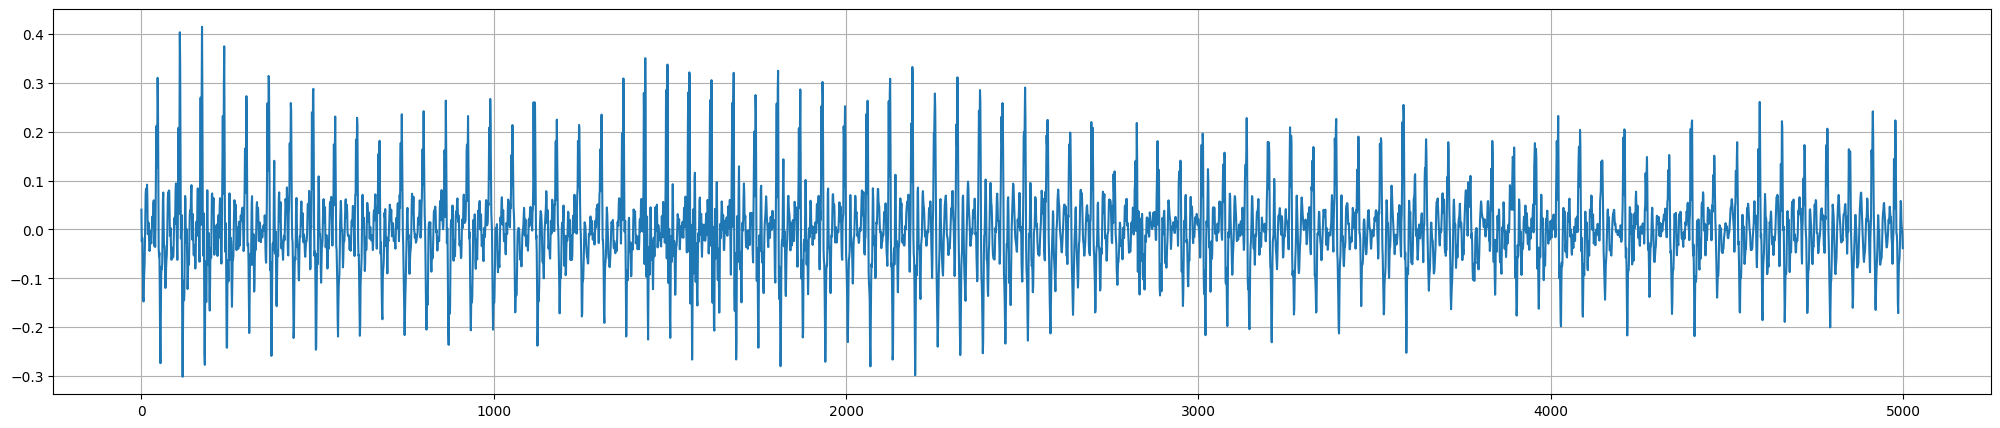

In [13]:
audioSignal = AudioSignal('audio_a.wav')
audioSignal.plotTimeDomain(15000, 20000)

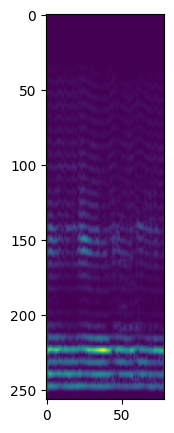

In [20]:
audioSignal = AudioSignal('audio_a.wav')
stft = audioSignal.frequencyDomain(15000, 20000, window_length = 256)
stft.shape
plt.figure(figsize=(45, 5))
plt.imshow(np.flip(stft,0))

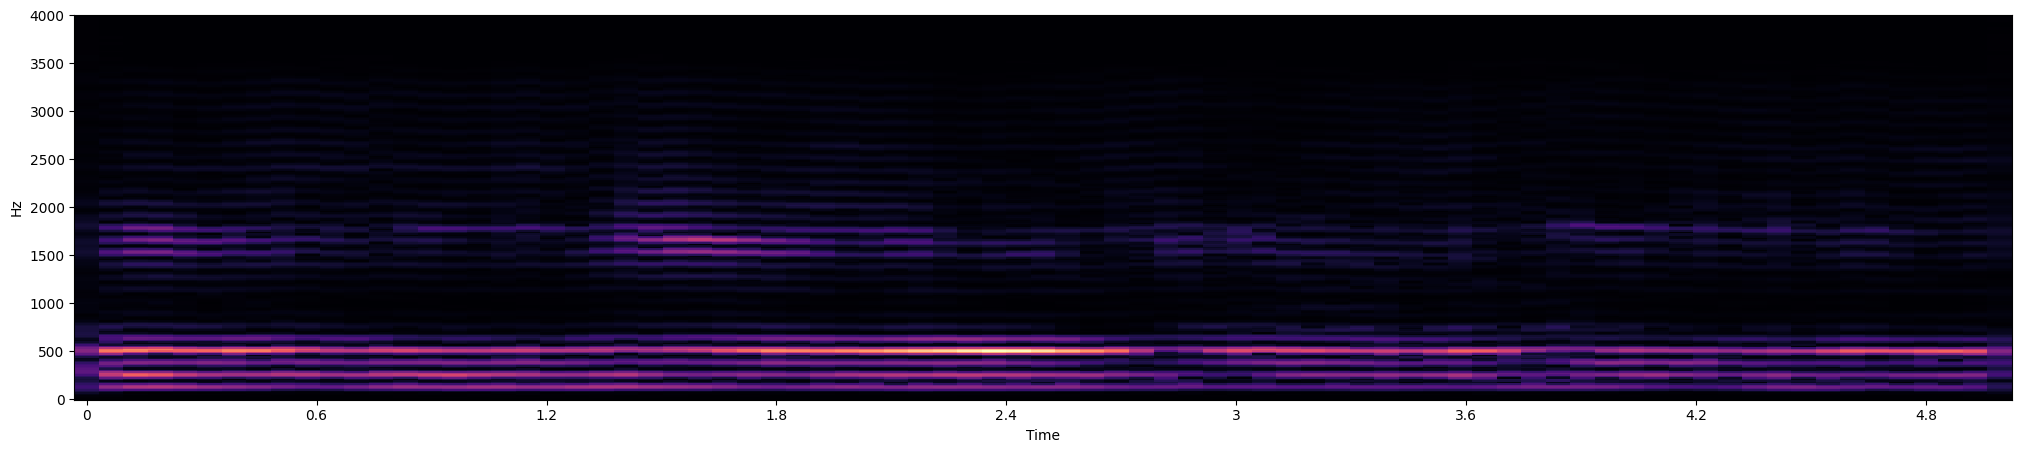

In [16]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(stft, sr=audioSignal.sample_rate, x_axis='time', y_axis='hz')

In [23]:
stft.shape

(257, 79)

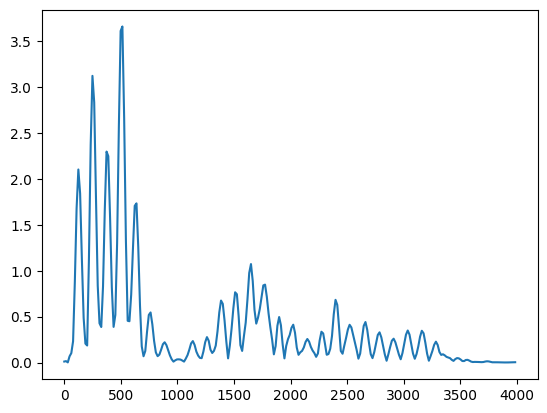

In [26]:
slice_point = 10
stft_slice = stft[:,slice_point]
fr = [x*4000/stft_slice.shape[0] for x in range(stft_slice.shape[0])]
plt.plot(fr, stft_slice)

In [ ]:
f0 = 500
f1 = 1600
f2 = 2400


(257, 157)


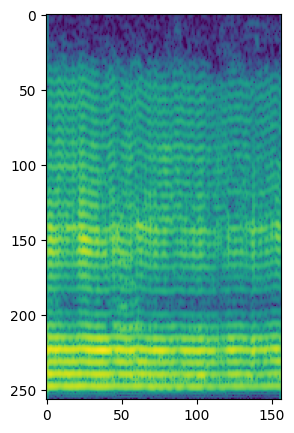

In [49]:
audioSignal = AudioSignal('audio_a.wav')
stft_db = audioSignal.frequencyDomainDB(15000, 25000, window_length = 256)
print(stft_db.shape)
plt.figure(figsize=(25, 5))
plt.imshow(np.flip(stft_db,0))

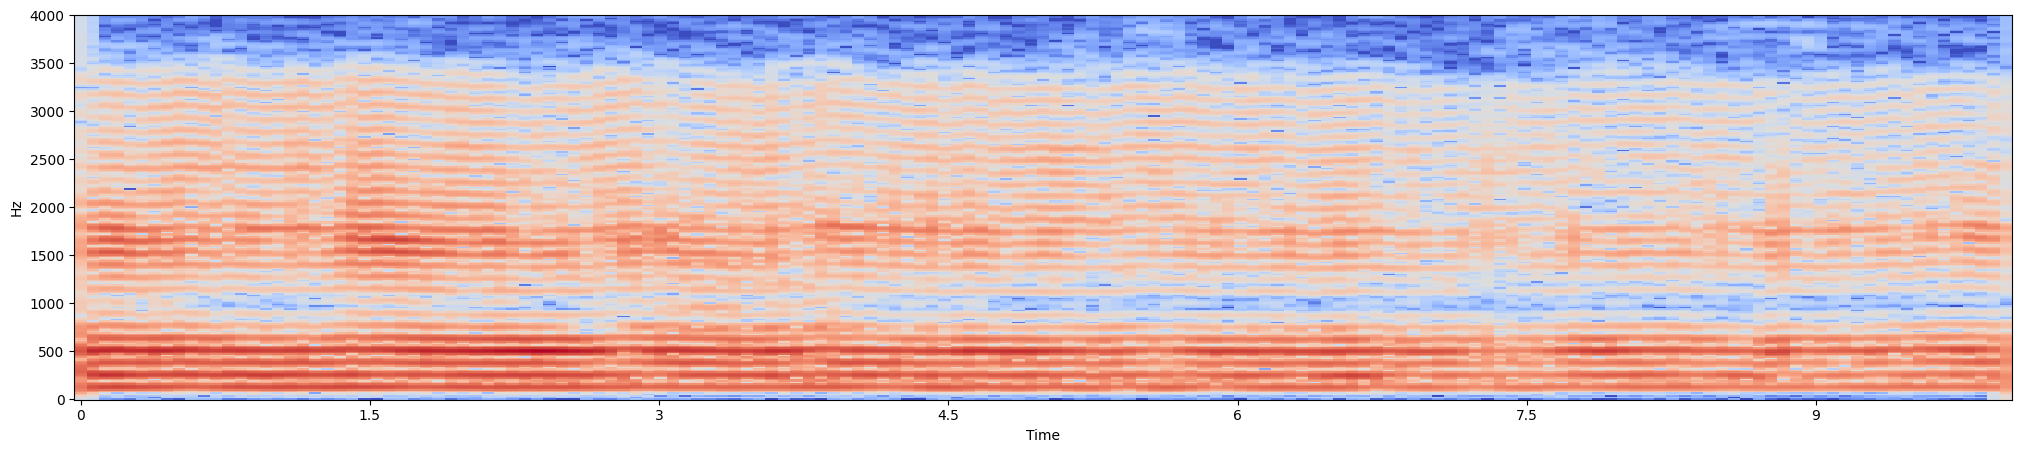

In [50]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(stft_db, sr=audioSignal.sample_rate, x_axis='time', y_axis='hz')

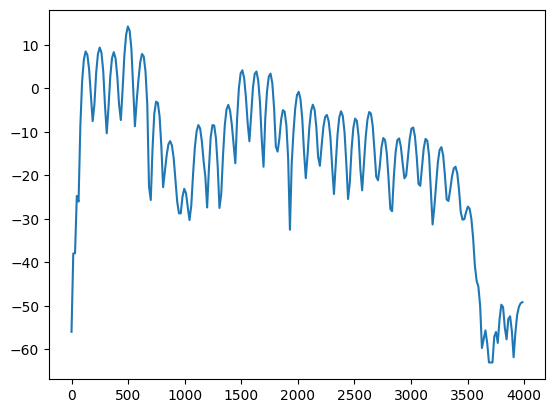

In [51]:
slice_point = 30
stft_db_slice = stft_db[:,slice_point]

fr = [x*4000/stft_db_slice.shape[0] for x in range(stft_db_slice.shape[0])]

plt.plot(fr, stft_db_slice)